In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.python.keras  import utils
from keras.utils import to_categorical
from sklearn.utils import class_weight, resample
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics

Matplotlib is building the font cache; this may take a moment.


In [2]:
#ecg_df=pd.read_csv(r"C:\Users\USER\Desktop\csvdataecgmitbih\MIT-BIH Arrhythmia Database.csv")

In [30]:
import sagemaker
from sagemaker import get_execution_role
import pandas as pd

sagemaker_session = sagemaker.Session()
role = get_execution_role()

s3_uri = 's3://psutgrad/MIT-BIH Arrhythmia Database.csv'

# Download the data to SageMaker instance
sagemaker_session.download_data(path='local/path', bucket='psutgrad', key_prefix='MIT-BIH Arrhythmia Database.csv')

ecg_df= pd.read_csv('local/path/MIT-BIH Arrhythmia Database.csv')



sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [31]:
ecg_df

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,101,N,76,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41,...,0.025930,2,18,22,2,0.025930,0.025930,0.025930,0.025436,0.025436
1,101,N,313,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,21,...,-0.042009,26,27,62,9,-0.042009,-0.029498,0.005012,0.030892,0.002986
2,101,N,315,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22,...,0.009528,3,8,12,1,0.009528,0.009528,0.008786,0.008786,0.008368
3,101,N,321,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22,...,-0.020536,6,9,16,1,-0.020536,-0.020257,-0.018965,-0.016968,-0.014555
4,101,N,336,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11,...,0.016053,16,5,31,10,0.016053,0.006742,0.002782,-0.007798,-0.051155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100684,234,N,240,241.0,-0.110230,1.420339,1.403346,1.403346,-0.115682,14,...,-0.069234,5,6,20,9,-0.069234,-0.068378,-0.065373,-0.060779,-0.054383
100685,234,N,241,243.0,-0.119014,1.424782,1.420328,1.420328,-0.134406,13,...,-0.069530,7,5,20,8,-0.069530,-0.069290,-0.066317,-0.053437,-0.045120
100686,234,N,243,252.0,0.173524,-0.443214,1.436878,-0.714642,-0.136431,38,...,-0.089396,9,7,24,8,-0.089396,-0.088155,-0.078611,-0.066763,-0.058650
100687,234,N,252,244.0,-0.119820,-0.401522,1.337051,-0.688560,-0.125076,27,...,-0.065487,3,1,12,8,-0.065487,-0.065487,-0.064941,-0.064941,-0.061120


              record       0_pre-RR      0_post-RR        0_pPeak  \
count  100689.000000  100689.000000  100689.000000  100689.000000   
mean      173.730984     279.400947     278.588207       0.049772   
std        51.673158      81.915453      81.124963       0.168789   
min       100.000000      11.000000       6.000000      -3.094391   
25%       115.000000     230.000000     230.000000      -0.054749   
50%       203.000000     267.000000     266.000000       0.015865   
75%       219.000000     324.000000     322.000000       0.125809   
max       234.000000    2114.000000    2114.000000       3.821118   

             0_tPeak        0_rPeak        0_sPeak        0_qPeak  \
count  100689.000000  100689.000000  100689.000000  100689.000000   
mean        0.372262       1.054485      -0.134376      -0.090466   
std         0.739879       0.617508       1.027590       0.189436   
min        -2.006422      -2.372835      -3.622550      -3.871359   
25%        -0.249060       0.7540

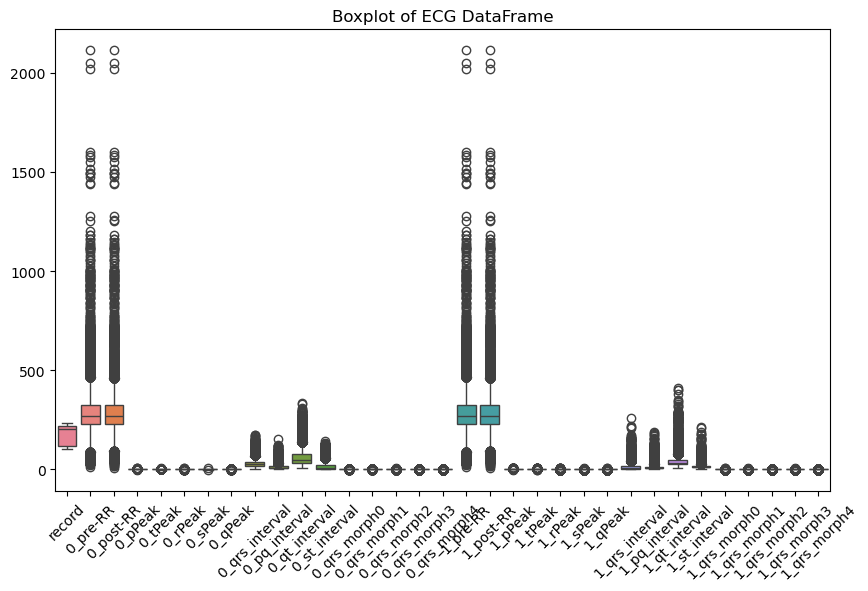

Number of  Rows with outliers:
record            46243
type              46243
0_pre-RR          46243
0_post-RR         46243
0_pPeak           46243
0_tPeak           46243
0_rPeak           46243
0_sPeak           46243
0_qPeak           46243
0_qrs_interval    46243
0_pq_interval     46243
0_qt_interval     46243
0_st_interval     46243
0_qrs_morph0      46243
0_qrs_morph1      46243
0_qrs_morph2      46243
0_qrs_morph3      46243
0_qrs_morph4      46243
1_pre-RR          46243
1_post-RR         46243
1_pPeak           46243
1_tPeak           46243
1_rPeak           46243
1_sPeak           46243
1_qPeak           46243
1_qrs_interval    46243
1_pq_interval     46243
1_qt_interval     46243
1_st_interval     46243
1_qrs_morph0      46243
1_qrs_morph1      46243
1_qrs_morph2      46243
1_qrs_morph3      46243
1_qrs_morph4      46243
dtype: int64


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'ecg_df' is your DataFrame

# Select numerical columns for summary statistics
numerical_cols = ecg_df.select_dtypes(include=['number']).columns
summary_stats = ecg_df[numerical_cols].describe()
print(summary_stats)

# Box plot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=ecg_df[numerical_cols])
plt.title("Boxplot of ECG DataFrame")
plt.xticks(rotation=45)  # Adjust the rotation angle as needed
plt.show()

# Identify and print rows with outliers using the IQR method
Q1 = ecg_df[numerical_cols].quantile(0.25)
Q3 = ecg_df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((ecg_df[numerical_cols] < (Q1 - 1.5 * IQR)) | (ecg_df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
outlier_rows = ecg_df[outliers]
print("Number of  Rows with outliers:")
print(outlier_rows.count())


In [5]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

In [32]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler

# Define or load your DataFrame 'ecg_df'

# Check the data types of the columns
print(ecg_df.info())

# Select numerical columns
numerical_columns = ecg_df.select_dtypes(include=np.number).columns

# Ensure there are no missing values
ecg_df.dropna(subset=numerical_columns, inplace=True)

# Initialize the RobustScaler
robust_scaler = RobustScaler()

# Fit and transform the selected columns
ecg_df[numerical_columns] = robust_scaler.fit_transform(ecg_df[numerical_columns])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100689 entries, 0 to 100688
Data columns (total 34 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   record          100689 non-null  int64  
 1   type            100689 non-null  object 
 2   0_pre-RR        100689 non-null  int64  
 3   0_post-RR       100689 non-null  float64
 4   0_pPeak         100689 non-null  float64
 5   0_tPeak         100689 non-null  float64
 6   0_rPeak         100689 non-null  float64
 7   0_sPeak         100689 non-null  float64
 8   0_qPeak         100689 non-null  float64
 9   0_qrs_interval  100689 non-null  int64  
 10  0_pq_interval   100689 non-null  int64  
 11  0_qt_interval   100689 non-null  int64  
 12  0_st_interval   100689 non-null  int64  
 13  0_qrs_morph0    100689 non-null  float64
 14  0_qrs_morph1    100689 non-null  float64
 15  0_qrs_morph2    100689 non-null  float64
 16  0_qrs_morph3    100689 non-null  float64
 17  0_qrs_morp

In [8]:
counter=0
for index, row in ecg_df.iterrows():
    for col in ecg_df.columns:
        if pd.isnull(row[col]):
            counter=counter+1
            print(f"Missing value in row {index}, column {col}")
if(counter==0):
    print("No missing values found")

No missing values found


In [33]:
mask = ecg_df['type'] =='Q'
ecg_df=ecg_df[~mask]

In [9]:
ecg_df['type'].value_counts()

N       90083
VEB      7009
SVEB     2779
F         803
Name: type, dtype: int64

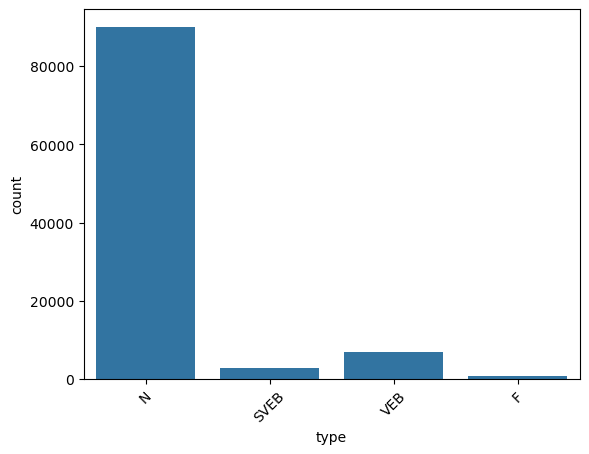

In [10]:
sns.countplot(x='type', data = ecg_df)
plt.xticks(rotation=45)
plt.show()

In [34]:
n_rows = ecg_df[ecg_df['type'] == 'N']

rows_to_keep = int(len(n_rows) * 0.20)

n_rows = n_rows.sample(n=rows_to_keep, random_state=42)

ecg_df = ecg_df[ecg_df['type'] != 'N']

ecg_df = pd.concat([ecg_df, n_rows])


In [9]:
ecg_df['type'].value_counts()

N       18016
VEB      7009
SVEB     2779
F         803
Name: type, dtype: int64

In [13]:
print(ecg_df.columns)

Index(['record', 'type', '0_pre-RR', '0_post-RR', '0_pPeak', '0_tPeak',
       '0_rPeak', '0_sPeak', '0_qPeak', '0_qrs_interval', '0_pq_interval',
       '0_qt_interval', '0_st_interval', '0_qrs_morph0', '0_qrs_morph1',
       '0_qrs_morph2', '0_qrs_morph3', '0_qrs_morph4', '1_pre-RR', '1_post-RR',
       '1_pPeak', '1_tPeak', '1_rPeak', '1_sPeak', '1_qPeak', '1_qrs_interval',
       '1_pq_interval', '1_qt_interval', '1_st_interval', '1_qrs_morph0',
       '1_qrs_morph1', '1_qrs_morph2', '1_qrs_morph3', '1_qrs_morph4'],
      dtype='object')


In [35]:
ecg_df= ecg_df.drop(columns=['record'])

In [15]:
print(ecg_df.columns)

Index(['type', '0_pre-RR', '0_post-RR', '0_pPeak', '0_tPeak', '0_rPeak',
       '0_sPeak', '0_qPeak', '0_qrs_interval', '0_pq_interval',
       '0_qt_interval', '0_st_interval', '0_qrs_morph0', '0_qrs_morph1',
       '0_qrs_morph2', '0_qrs_morph3', '0_qrs_morph4', '1_pre-RR', '1_post-RR',
       '1_pPeak', '1_tPeak', '1_rPeak', '1_sPeak', '1_qPeak', '1_qrs_interval',
       '1_pq_interval', '1_qt_interval', '1_st_interval', '1_qrs_morph0',
       '1_qrs_morph1', '1_qrs_morph2', '1_qrs_morph3', '1_qrs_morph4'],
      dtype='object')


In [36]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
X = ecg_df.drop('type', axis=1)
y = ecg_df['type']
lb= LabelEncoder()
y=lb.fit_transform(y)
selector = SelectKBest(f_classif, k=10)
selector.fit(X, y)
selected_indices = selector.get_support(indices=True)
if len(selected_indices) > 0:
    selected_features = X.columns[selected_indices]
    print(selected_features)

Index(['0_pre-RR', '0_pPeak', '0_rPeak', '0_sPeak', '0_qt_interval',
       '1_pre-RR', '1_qPeak', '1_qt_interval', '1_qrs_morph0', '1_qrs_morph1'],
      dtype='object')


In [37]:
selected=['0_pre-RR', '0_pPeak', '0_rPeak', '0_sPeak', '0_qt_interval','1_pre-RR', '1_qPeak', '1_qt_interval', '1_qrs_morph0', '1_qrs_morph1','type']
ecg_df=ecg_df.loc[:, selected]

In [12]:
ecg_df

,0_pre-RR,0_pPeak,0_rPeak,0_sPeak,0_qt_interval,1_pre-RR,1_qPeak,1_qt_interval,1_qrs_morph0,1_qrs_morph1,type
420,-0.776596,-0.441555,0.266343,0.119755,-0.357143,-0.776596,0.228382,-1.15,0.228382,0.226947,SVEB
644,0.702128,0.110813,0.284297,0.070290,-0.261905,0.702128,0.270895,-0.30,0.270895,0.270943,SVEB
1537,-0.319149,-0.117868,0.373583,0.117490,-0.285714,-0.319149,0.212115,0.55,0.212115,0.212151,SVEB
1966,-0.712766,-2.296417,-0.064934,-0.547229,1.595238,-0.712766,0.183384,0.75,0.183384,0.204919,VEB
1967,-0.946809,4.175346,-0.242240,-0.526348,3.238095,-0.946809,-0.717862,-0.30,-0.717862,-0.677092,VEB
...,...,...,...,...,...,...,...,...,...,...,...
13067,1.329787,-0.395716,0.874214,1.346699,-0.238095,1.329787,-0.417100,-0.60,-0.417100,-0.393824,N
13250,0.478723,-0.114855,0.578480,1.225794,-0.190476,0.478723,-0.221401,-0.70,-0.221401,-0.205617,N
71857,-0.478723,-0.159711,-0.235514,-0.009617,2.309524,-0.478723,-0.061466,-0.20,-0.061466,-0.108109,N
62652,1.755319,-0.579410,-0.730680,-0.094958,0.047619,1.755319,0.075497,0.10,0.075497,0.204329,N


In [38]:
X = ecg_df.drop('type', axis=1)
y = ecg_df['type']
lb=LabelEncoder()
y=lb.fit_transform(y)

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [41]:
pip install -U imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 19.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [42]:
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
smote = SMOTE()
x_train2, y_train2 = smote.fit_resample(x_train, y_train)
print("Before SMOTE:")
print(pd.Series(y_train).value_counts())
print("After SMOTE:")
print(pd.Series(y_train2).value_counts())

Before SMOTE:
1    11541
3     4492
2     1758
0      517
dtype: int64
After SMOTE:
0    11541
2    11541
1    11541
3    11541
dtype: int64


In [18]:
x_train2

,0_pre-RR,0_pPeak,0_rPeak,0_sPeak,0_qt_interval,1_pre-RR,1_qPeak,1_qt_interval,1_qrs_morph0,1_qrs_morph1
0,-0.712766,1.228926,0.029430,1.001325,0.023810,-0.712766,-0.864242,0.300000,-0.864242,-0.823848
1,-1.063830,0.418602,0.114163,1.035966,-0.642857,-1.063830,0.122571,-0.350000,0.122571,0.125187
2,-0.085106,0.159760,-0.820034,0.654037,-0.190476,-0.085106,0.219327,-0.100000,0.219327,0.242506
3,0.063830,-0.743316,0.503729,-0.140574,-0.095238,0.063830,0.184785,-0.150000,0.184785,0.294787
4,0.680851,-0.177981,-1.026374,0.188623,-0.380952,0.680851,-0.719766,-0.550000,-0.719766,-0.684903
...,...,...,...,...,...,...,...,...,...,...
46159,-0.479646,-0.479176,0.627425,-0.484354,2.939334,-0.479646,-1.687577,0.323063,-1.687577,-1.374073
46160,-0.608401,0.389194,-3.233698,-0.665873,0.340305,-0.608401,-6.944677,4.208748,-6.944677,-6.003851
46161,-0.888123,3.784772,-0.402808,-0.548108,3.704300,-0.888123,-1.037691,0.038734,-1.037691,-0.970250
46162,-0.641556,0.270982,-3.695649,-0.827162,0.324343,-0.641556,-0.074745,0.727552,-0.074745,-0.064576


In [19]:
y_train2

array([0, 2, 2, ..., 3, 3, 3])

In [43]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, GRU

In [45]:
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

In [46]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))

model.add(MaxPooling1D(pool_size=3, strides=2, padding='same'))
model.add(Dropout(0.2))

model.add(Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv1D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=3, strides=2, padding='same'))
model.add(Dropout(0.2))

gru_units = 128 
model.add(GRU(gru_units))

model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(units=4, activation='softmax'))


In [47]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [48]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Use the EarlyStopping callback in the fit method
history = model.fit(x_train2, y_train2, validation_data=(x_val, y_val), epochs=30, callbacks=[early_stopping])


Epoch 1/30
1443/1443 [==============================] - 37s 24ms/step - loss: 0.3672 - accuracy: 0.8751 - val_loss: 0.2675 - val_accuracy: 0.9082
Epoch 2/30
1443/1443 [==============================] - 34s 24ms/step - loss: 0.2014 - accuracy: 0.9331 - val_loss: 0.2682 - val_accuracy: 0.9124
Epoch 3/30
1443/1443 [==============================] - 34s 24ms/step - loss: 0.1604 - accuracy: 0.9478 - val_loss: 0.3033 - val_accuracy: 0.8962
Epoch 4/30
1443/1443 [==============================] - 34s 24ms/step - loss: 0.1360 - accuracy: 0.9560 - val_loss: 0.2188 - val_accuracy: 0.9321
Epoch 5/30
1443/1443 [==============================] - 36s 25ms/step - loss: 0.1210 - accuracy: 0.9613 - val_loss: 0.2275 - val_accuracy: 0.9272
Epoch 6/30
1443/1443 [==============================] - 34s 24ms/step - loss: 0.1083 - accuracy: 0.9647 - val_loss: 0.2106 - val_accuracy: 0.9296
Epoch 7/30
1443/1443 [==============================] - 34s 24ms/step - loss: 0.1014 - accuracy: 0.9656 - val_loss: 0.1923 -

In [49]:
model.save("ecggrad.h5")

/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
results = model.evaluate(x_test, y_test)
print("Test Loss:", results[0])
print("Test Metrics:", results[1:])

179/179 [==============================] - 1s 4ms/step - loss: 0.1940 - accuracy: 0.9394
Test Loss: 0.19395112991333008
Test Metrics: [0.9393568634986877]


Text(0.5, 0, 'epoch')

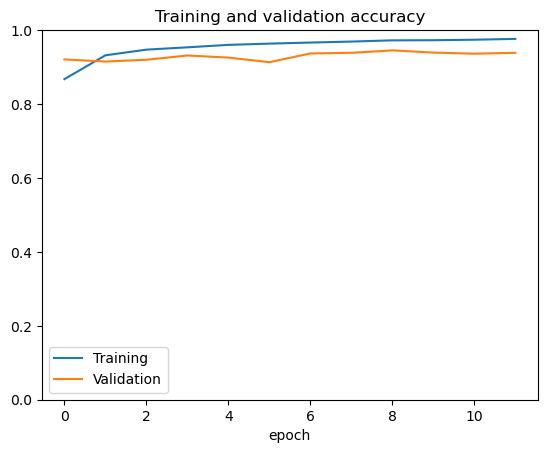

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim(0,1)
plt.legend(['Training', 'Validation'])
plt.title("Training and validation accuracy")
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

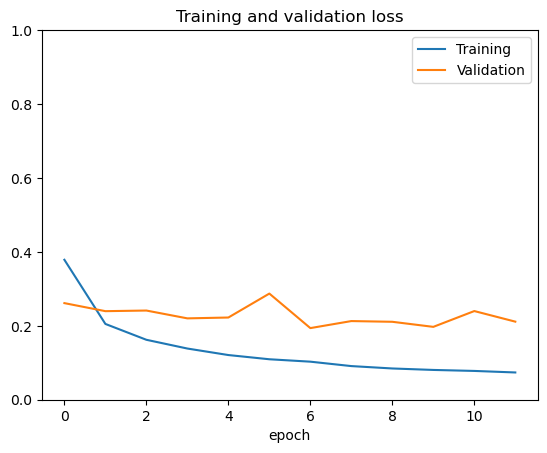

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,1)
plt.legend(['Training', 'Validation'])
plt.title("Training and validation loss")
plt.xlabel('epoch')

In [28]:
from sklearn.metrics import precision_recall_fscore_support

# Assuming y_val is your true labels and y_pred_classes is your predicted labels
y_pred = model.predict(x_val)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision, recall, and f1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_val, y_pred_classes, average='weighted')

# Print recall and f1 score
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')
print(f'Precision: {precision:.4f}')


144/144 [==============================] - 1s 3ms/step
Recall: 0.9369
F1 Score: 0.9393
Precision: 0.9449


In [78]:
import pandas as pd
from sagemaker import Predictor
from sagemaker.serializers import CSVSerializer
import subprocess
import os
import pandas as pd
from sklearn.preprocessing import RobustScaler
ecg_classifier = load_model('ecg_classifier.keras')
def run_plotdigitizer(image_path):
    command = f'plotdigitizer "{image_path}" -p 0,0 -p 2,0 -p 0,1 -l 2,29 -l 4,5 -l 22,5'

    output = subprocess.run(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

    image_path2 = os.path.splitext(image_path)[0] + ".png.traj.csv"

    df = pd.read_csv(image_path2, sep=' ', header=None)
    scaler = RobustScaler()
    df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    # Select only the second column
    df = df.iloc[:, 1:2]

    # Take the first 10 rows and transpose
    df = df.head(10).T.reset_index(drop=True)

    # Name each column
    df.columns = ['0_pre-RR', '0_pPeak', '0_rPeak', '0_sPeak', '0_qt_interval',
                  '1_pre-RR', '1_qPeak', '1_qt_interval', '1_qrs_morph0', '1_qrs_morph1']

    # Convert to numerical format
    df = df.apply(pd.to_numeric, errors='coerce')

# Print or process the inference result as needed
    display(df)


In [79]:
run_plotdigitizer("/home/ec2-user/SageMaker/ST-elevation-1024x387.png")

,0_pre-RR,0_pPeak,0_rPeak,0_sPeak,0_qt_interval,1_pre-RR,1_qPeak,1_qt_interval,1_qrs_morph0,1_qrs_morph1
0,0.236521,0.250434,0.250434,0.243478,0.236521,0.229564,0.222609,0.222609,0.208695,0.194782


In [86]:
import pandas as pd
from sagemaker import Predictor
from sagemaker.serializers import CSVSerializer
import subprocess
import os
import pandas as pd
from sklearn.preprocessing import RobustScaler
def run_plotdigitizer(image_path):
    command = f'plotdigitizer "{image_path}" -p 0,0 -p 2,0 -p 0,1 -l 2,29 -l 4,5 -l 22,5'

    output = subprocess.run(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

    image_path2 = os.path.splitext(image_path)[0] + ".png.traj.csv"

    df = pd.read_csv(image_path2, sep=' ', header=None)
    scaler = RobustScaler()
    df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    df = df.iloc[:, 1:2]

    df = df.head(10).T.reset_index(drop=True)

    df.columns = ['0_pre-RR', '0_pPeak', '0_rPeak', '0_sPeak', '0_qt_interval',
                  '1_pre-RR', '1_qPeak', '1_qt_interval', '1_qrs_morph0', '1_qrs_morph1']

    df = df.apply(pd.to_numeric, errors='coerce')

    predictions = model.predict(df)
    predicted_label_index = np.argmax(predictions)

    class_labels = ["N", "VEB", "SVEB", "Fusion"]

    predicted_label = class_labels[predicted_label_index]

    print(f"The predicted label is: {predicted_label}")


run_plotdigitizer("/home/ec2-user/SageMaker/ST-elevation-1024x387.png")

1/1 [==============================] - 0s 20ms/step
The predicted label is: VEB
